<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from scipy.stats import kde

In [776]:
def get_param():
    dt = 0.008
    A = 0.3
    w = 1
    n = 1000
    m = 60
    return dt, A, w, n, m

In [751]:
def f(x):
    return x - x**3

def step(x1, x, p2):
    p = get_param()
    dt, A = p[:2]
    return (f(x) + A * np.sin(x1) + p2) * dt

def step_x1():
    p = get_param()
    dt, w = p[0], p[2]
    return w * dt

def step_p1(x1, p2):
    p = get_param()
    dt, A = p[:2]
    return (- A * np.cos(x1) * p2) * dt

def step_p2(x, p2):
    p = get_param()
    dt = p[0]
    return ( ( -1 + 3 * x**2 ) * p2 ) * dt

In [522]:
def init_cond(array_in = 0, init=False, mode = 'zeros'):
    par = get_param()
    n, m = par[3], par[4]
    if init:
        if mode == 'ones':
            x_init = array_in                  # Condizioni iniziali
            x_aux = np.ones((n-1 , m))          # Resto della matrice
            fin = np.vstack((x_init,x_aux))  # Unisco i vettori
            return fin
        if mode == 'zeros':
            x_init = array_in                  # Condizioni iniziali
            x_aux = np.zeros((n-1 , m))          # Resto della matrice
            fin = np.vstack((x_init,x_aux))  # Unisco i vettori
            return fin
    else:
        if mode == 'zeros': 
            return np.zeros((n , m))
        if mode == 'ones':
            return np.ones((n , m))


In [616]:
def motion(x, x1, p1, p2, n, m):
    '''Gestione del movimento del camminatore'''
    aux = x
    p = get_param()
    dt, A, w = p[:3]
    print('start cycling')
    s = []
    for j in range(m-1):
        for i in range(n-1):
            if np.abs(x[i,j]) <= 1.5:
                x1[i+1,j] = x1[i,j] + step_x1()
                x[i+1,j]  = x[i,j]  + step( x1[i,j], x[i,j], p2[i,j] ) 
                p1[i+1,j] = p1[i,j] + step_p1( x1[i,j], p2[i,j] )
                p2[i+1,j] = p2[i,j] + step_p2( x[i,j], p2[i,j] )
            else:
                s.append(i)
                x[i+1,j] = x[i,j] 
    return x, s

setting up
End setting
start cycling
setting up
End setting
start cycling


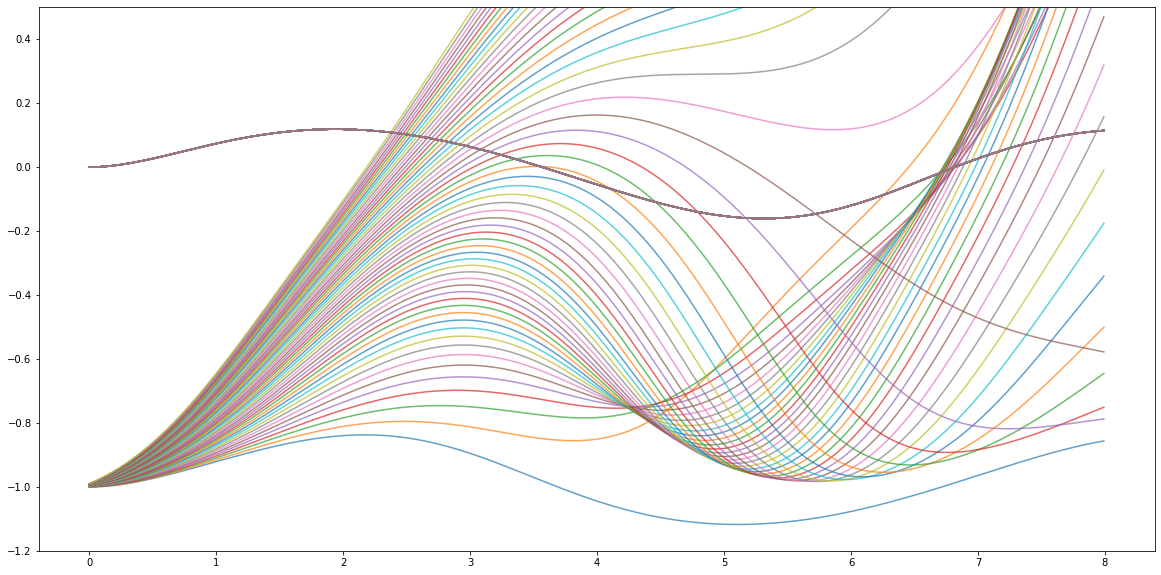

In [777]:
def main():
    par = get_param()
    n, m = par[3], par[4] # prendo i parametri del problema
    dt = par[0]

    # Parte di sotto
    print('setting up')  #############################################
    
    # Creo x
    x01,x02 = -1,-0.99
    space = (x02-x01)/(m)
    x = init_cond(array_in=np.arange(x01, x02, space), init=True, mode='ones')
    
    # Creo x1
    x11,x12 = 0, -3
    space = (x12-x11)/(m)
    x1 = init_cond(array_in=-0.01*np.ones(m), init=True, mode='zeros')
    # array_in=np.arange(0, 2, 2/m), mode='m'
    
    # Creo p1:
    p01,p02 = 0,1
    space = (p02-p01)/(m)
    p1 = init_cond(array_in=np.arange(p01, p02, space), init=True, mode='zeros')
    
    # Creo p2
    p11,p12 = 0,0.2
    space = (p12-p11)/(m)
    p2 = init_cond(array_in=np.arange(p11, p12, space), init=True, mode='zeros') 
    
    print('End setting') #############################################
    
    x, s = motion(x, x1, p1, p2, n, m)
    t = np.arange(0,n*dt,dt)
    plt.figure(figsize=(20,10))
    for i in range(m-1):
        plt.plot(t, x[:,i], alpha=0.7)
        
    # Parte di sopra
    print('setting up')  #############################################
    x01,x02 = 0.1,-0.1
    space = (x02-x01)/(m)
    x = init_cond(array_in=np.ones(m), init=True, mode='zeros') # Tutti in 0 all'inizio
    # Creo x1
    x1 = init_cond(array_in=np.ones(m), init=False, mode='zeros')
    # Creo p1:
    p1 = init_cond()
    # Creo p2
    #p2_init = np.arange(0, 0.00001, 0.00001/m)     # Condizioni iniziali
    p2 = init_cond() 
    # array_in=np.arange(-0.1,0., 0.1/m), mode='m'
    print('End setting') #############################################
    x, s = motion(x, x1, p1, p2, n, m)
    for i in range(m-1):
        plt.plot(t, x[:,i]-1, alpha=0.7)
    plt.ylim(-1.2,0.5)
    plt.show()
main()